<a href="https://colab.research.google.com/github/kwanderer/Autonomas-sistemas-un-roboti/blob/main/CNN/FMulticlass_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
plt.style.use('ggplot')
import seaborn as sns 
%matplotlib inline

In [2]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
#os.chdir("/content/gdrive/MyDrive/Colab Notebooks/data_binary/")
os.chdir("/content/gdrive/MyDrive/Colab Notebooks/data_multiclass")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
#df = pd.read_csv("binary_data_csv.csv")
df = pd.read_csv("combined_multiclass_csv.csv")

In [4]:
df.head()

,tachometer,und-accelerometer-axial,und-accelerometer-radial,und-accelerometer-tangential,over-accelerometer-axial,over-accelerometer-radial,over-accelerometer-tangential,microphone,Class
0,-0.59640,1.65690,0.20359,0.048174,-0.18477,-0.021301,-0.18447,-0.017205,7
1,-0.52322,-0.28902,-0.31740,-0.001450,-0.19779,-0.023694,-0.28712,-0.018203,7
2,-0.55320,1.64770,0.41715,0.038655,-0.18563,-0.021564,-0.21215,-0.072039,7
3,-0.57723,0.15914,-0.33321,-0.011148,-0.19892,-0.025401,-0.30076,-0.007373,7
4,-0.49280,1.31650,0.41147,0.028096,-0.19165,-0.022879,-0.24147,-0.108590,7


In [5]:
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 30000000 rows and 9 columns.


In [6]:
sequence_length = 200

In [7]:
def generate_data(X, y, sequence_length = 200, step = 200):
    X_local = []
    y_local = []
    for start in range(0, len(df) - sequence_length, step):
        end = start + sequence_length
        X_local.append(X[start:end])
        y_local.append(y[end-1])
    return np.array(X_local), np.array(y_local)

X_sequence, y = generate_data(df.loc[:, ["tachometer", "und-accelerometer-axial", "und-accelerometer-radial", "und-accelerometer-tangential", "over-accelerometer-axial", "over-accelerometer-radial", "over-accelerometer-tangential", "microphone"]].values, df.Class)
#X_sequence, y = generate_data(data.loc[:, ["und-accelerometer-axial", "und-accelerometer-radial", "und-accelerometer-tangential", "microphone"]].values, data.Class)


In [8]:
X_sequence.shape, y.shape

((149999, 200, 8), (149999,))

In [9]:
unique, counts = np.unique(y, return_counts=True)

In [10]:
unique

array([0, 1, 2, 3, 4, 5, 6, 7])

Text(0.5, 1.0, 'Heatmap of Correlation')

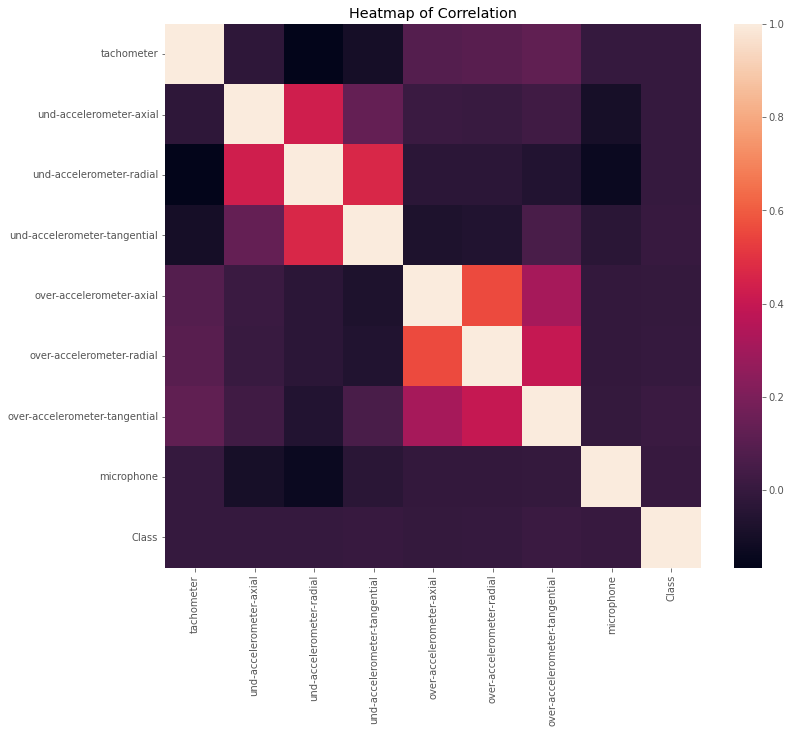

In [11]:
#finding correlation between columns and plotting heatmap

corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [12]:
df.isnull().sum()

tachometer                       0
und-accelerometer-axial          0
und-accelerometer-radial         0
und-accelerometer-tangential     0
over-accelerometer-axial         0
over-accelerometer-radial        0
over-accelerometer-tangential    0
microphone                       0
Class                            0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000000 entries, 0 to 29999999
Data columns (total 9 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   tachometer                     float64
 1   und-accelerometer-axial        float64
 2   und-accelerometer-radial       float64
 3   und-accelerometer-tangential   float64
 4   over-accelerometer-axial       float64
 5   over-accelerometer-radial      float64
 6   over-accelerometer-tangential  float64
 7   microphone                     float64
 8   Class                          int64  
dtypes: float64(8), int64(1)
memory usage: 2.0 GB


In [14]:
df = 0

**Model-1(Over Sampling)**

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, roc_auc_score

In [16]:
shuffler = np.random.permutation(len(X_sequence))
X_sequence_shuffled = X_sequence[shuffler]
y_shuffled = y[shuffler]

In [17]:
training_size = int(len(X_sequence) * 0.8)
val_size = int(len(X_sequence) * 0.9)

In [18]:
X_train, y_train = X_sequence_shuffled[:training_size], y_shuffled[:training_size]
X_val, y_val = X_sequence_shuffled[training_size:val_size], y_shuffled[training_size:val_size]
X_test, y_test = X_sequence_shuffled[val_size:], y_shuffled[val_size:]

In [19]:
y_train.shape,y_val.shape, y_test.shape

((119999,), (15000,), (15000,))

In [20]:
X_train.shape, X_val.shape, X_test.shape

((119999, 200, 8), (15000, 200, 8), (15000, 200, 8))

In [21]:
X_train[:10]

array([[[-7.9991e-01, -3.0383e-01,  1.9273e-01, ..., -4.1092e-02,
          1.1763e+00, -1.1877e-01],
        [-7.9497e-01,  6.0652e-01, -9.4816e-02, ..., -4.3627e-02,
          1.1199e+00,  8.7959e-02],
        [-7.4986e-01, -1.0973e+00, -1.3186e-01, ..., -4.4461e-02,
          9.9912e-01, -5.2447e-02],
        ...,
        [-5.4455e-01, -1.1474e+00, -1.8232e-01, ...,  1.8757e-02,
          9.4420e-01,  4.2364e-03],
        [-5.6227e-01,  1.3376e+00,  2.3434e-01, ...,  2.0638e-02,
          1.0425e+00, -1.3920e-02],
        [-5.2275e-01, -1.4205e+00, -4.6558e-01, ...,  1.8976e-02,
          9.6101e-01,  1.1020e-01]],

       [[-6.6458e-01, -5.9952e-02,  2.9613e-01, ..., -1.9003e-02,
          6.2601e-02, -1.6834e-01],
        [-6.4476e-01,  5.2320e-01, -1.2806e-01, ..., -2.3970e-02,
          4.8421e-02,  2.3625e-01],
        [-6.6227e-01, -9.8094e-01, -4.0961e-03, ..., -1.9818e-02,
         -5.0174e-02, -3.6384e-02],
        ...,
        [-9.5001e-01, -1.0898e+00, -2.6112e-01, ...,  

In [22]:
X_sequence = 0
y = 0

In [23]:
epochs=100
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=X_train[0].shape),
    tf.keras.layers.MaxPooling1D(pool_size=1),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling1D((1)),
    tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1)
])

model_cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 198, 32)           800       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 198, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 196, 64)           6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 196, 64)          0         
 1D)                                                             
                                                                 
 conv1d_2 (Conv1D)           (None, 194, 64)           12352     
                                                                 
 flatten (Flatten)           (None, 12416)             0

In [24]:
# Compile the model as usual
optimizer = tf.keras.optimizers.Adam(lr=0.0001)
model_cnn.compile(optimizer=optimizer,
                 loss='mse',
                 metrics=['accuracy'])

In [25]:
# Train the model
history = model_cnn.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_val, y_val))

Epoch 1/100
1875/1875 [==============================] - 25s 8ms/step - loss: 2.3444 - accuracy: 0.1539 - val_loss: 1.7623 - val_accuracy: 0.1793
Epoch 2/100
1875/1875 [==============================] - 12s 7ms/step - loss: 1.6386 - accuracy: 0.1890 - val_loss: 1.5091 - val_accuracy: 0.1887
Epoch 3/100
1875/1875 [==============================] - 12s 6ms/step - loss: 1.4061 - accuracy: 0.2024 - val_loss: 1.3873 - val_accuracy: 0.2018
Epoch 4/100
1875/1875 [==============================] - 12s 7ms/step - loss: 1.2514 - accuracy: 0.2104 - val_loss: 1.2539 - val_accuracy: 0.2007
Epoch 5/100
1875/1875 [==============================] - 12s 6ms/step - loss: 1.1175 - accuracy: 0.2153 - val_loss: 1.0616 - val_accuracy: 0.2095
Epoch 6/100
1875/1875 [==============================] - 12s 6ms/step - loss: 1.0042 - accuracy: 0.2190 - val_loss: 0.9855 - val_accuracy: 0.2106
Epoch 7/100
1875/1875 [==============================] - 12s 6ms/step - loss: 0.9139 - accuracy: 0.2223 - val_loss: 0.9566 -

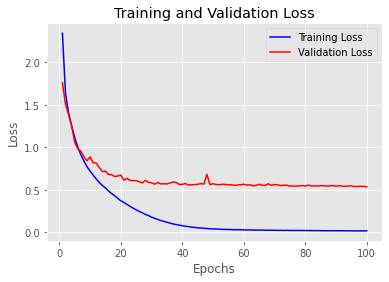

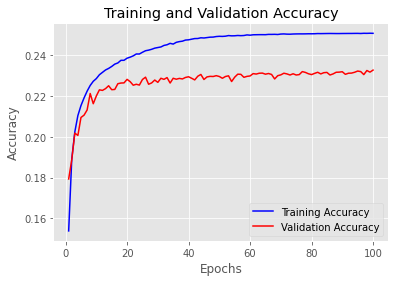

In [26]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('cnn_loss_plot.png')
plt.show()

plt.figure()

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('cnn_acc_plot.png')
plt.show()

In [27]:
val_predictions = model_cnn.predict(X_test)

In [28]:
unique, counts = np.unique(val_predictions, return_counts=True)

In [29]:
unique

array([-1.4368187 , -1.1568475 , -0.98465073, ...,  9.30631   ,
        9.696242  ,  9.882986  ], dtype=float32)

In [30]:
val_predictions = model_cnn.predict(X_test)
pred=np.around(val_predictions)
pred

array([[6.],
       [5.],
       [1.],
       ...,
       [3.],
       [3.],
       [7.]], dtype=float32)

In [31]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.96      0.94      0.95      1865
         1.0       0.89      0.90      0.90      1876
         2.0       0.85      0.57      0.68      1839
         3.0       0.55      0.55      0.55      1925
         4.0       0.44      0.62      0.51      1930
         5.0       0.44      0.56      0.49      1860
         6.0       0.53      0.47      0.50      1899
         7.0       0.80      0.48      0.60      1806
         8.0       0.00      0.00      0.00         0
         9.0       0.00      0.00      0.00         0
        10.0       0.00      0.00      0.00         0

    accuracy                           0.64     15000
   macro avg       0.46      0.43      0.43     15000
weighted avg       0.68      0.64      0.65     15000



In [32]:
def get_confusion_matrix(y_true, y_pred):
    n_classes = len(np.unique(y_true))
    conf = np.zeros((n_classes, n_classes))
    for actual, pred in zip(y_true, y_pred):
        conf[int(actual)][int(pred)] += 1
    return conf.astype('int')

In [33]:
cfm=confusion_matrix(y_test, pred)

In [34]:
cfm

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [  28, 1761,   60,   11,    5,    0,    0,    0,    0,    0,    0,
           0],
       [   1,   64, 1690,   74,   30,   13,    1,    2,    1,    0,    0,
           0],
       [   1,   15,  140, 1045,  450,  157,   30,    1,    0,    0,    0,
           0],
       [   0,    0,    2,   92, 1061,  603,  144,   23,    0,    0,    0,
           0],
       [   0,    0,    0,    4,  272, 1202,  425,   25,    2,    0,    0,
           0],
       [   0,    0,    0,    2,   70,  597, 1047,  143,    1,    0,    0,
           0],
       [   0,    0,    0,    0,   27,  167,  605,  886,  210,    4,    0,
           0],
       [   0,    0,    0,    0,    3,   16,  127,  580,  875,  201,    2,
           2],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,  

In [35]:
y_test

array([6, 5, 1, ..., 3, 4, 7])

In [36]:
pred

array([[6.],
       [5.],
       [1.],
       ...,
       [3.],
       [3.],
       [7.]], dtype=float32)

In [37]:
y_pred = pred.astype(int)

In [38]:
y_pred

array([[6],
       [5],
       [1],
       ...,
       [3],
       [3],
       [7]])

In [39]:
y_pred.shape

(15000, 1)

In [41]:
i = 0
while i < 15000:
  if y_pred[i] < 0:
    y_pred[i] = 0
  elif y_pred[i] > 7:
    y_pred[i] = 7
  i+=1

In [42]:
y_pred.shape

(15000, 1)

In [43]:
y_pred

array([[6],
       [5],
       [1],
       ...,
       [3],
       [3],
       [7]])

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1865
           1       0.89      0.90      0.90      1876
           2       0.85      0.57      0.68      1839
           3       0.55      0.55      0.55      1925
           4       0.44      0.62      0.51      1930
           5       0.44      0.56      0.49      1860
           6       0.53      0.47      0.50      1899
           7       0.83      0.60      0.70      1806

    accuracy                           0.65     15000
   macro avg       0.69      0.65      0.66     15000
weighted avg       0.68      0.65      0.66     15000



Text(0.5, 15.0, 'Predicted label')

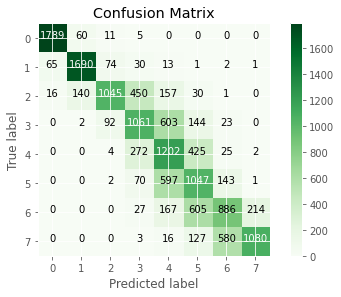

In [46]:
import itertools

print(classification_report(y_test, y_pred))

conf = get_confusion_matrix(y_test, y_pred)
conf

classes = [0, 1, 2, 3, 4, 5, 6, 7]
# plot confusion matrix
plt.imshow(conf, interpolation='nearest', cmap=plt.cm.Greens)
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

fmt = 'd'
thresh = conf.max() / 2.
for i, j in itertools.product(range(conf.shape[0]), range(conf.shape[1])):
    plt.text(j, i, format(conf[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1789   60   11    5    0    0    0    0]
 [  65 1690   74   30   13    1    2    1]
 [  16  140 1045  450  157   30    1    0]
 [   0    2   92 1061  603  144   23    0]
 [   0    0    4  272 1202  425   25    2]
 [   0    0    2   70  597 1047  143    1]
 [   0    0    0   27  167  605  886  214]
 [   0    0    0    3   16  127  580 1080]]
Normalized confusion matrix
[[9.59e-01 3.22e-02 5.90e-03 2.68e-03 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [3.46e-02 9.01e-01 3.94e-02 1.60e-02 6.93e-03 5.33e-04 1.07e-03 5.33e-04]
 [8.70e-03 7.61e-02 5.68e-01 2.45e-01 8.54e-02 1.63e-02 5.44e-04 0.00e+00]
 [0.00e+00 1.04e-03 4.78e-02 5.51e-01 3.13e-01 7.48e-02 1.19e-02 0.00e+00]
 [0.00e+00 0.00e+00 2.07e-03 1.41e-01 6.23e-01 2.20e-01 1.30e-02 1.04e-03]
 [0.00e+00 0.00e+00 1.08e-03 3.76e-02 3.21e-01 5.63e-01 7.69e-02 5.38e-04]
 [0.00e+00 0.00e+00 0.00e+00 1.42e-02 8.79e-02 3.19e-01 4.67e-01 1.13e-01]
 [0.00e+00 0.00e+00 0.00e+00 1.66e-03 8.86e-03 7.03e-02 3.21e-

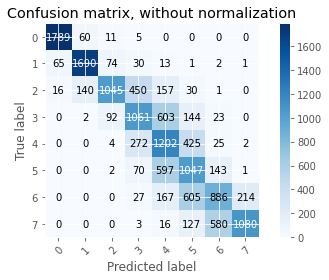

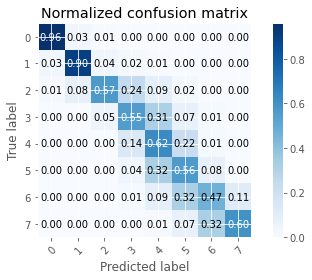

In [45]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

class_names = np.array([0, 1, 2, 3, 4, 5, 6, 7])

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()